In [58]:
import pandas as pd

#docs = pd.read_excel('SMSSpamCollection.xls',header=None,names=['Class', 'SMS']) 
#docs = pd.read_table('SMSSpamCollection', header=None, names=['Class', 'sms'])
docs = pd.read_csv('movie_review_train.csv') 
#classifier in column 1, sms in column 2.
docs.head()


,Class,sms
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [59]:
import pandas as pd

#docs = pd.read_excel('SMSSpamCollection.xls',header=None,names=['Class', 'SMS']) 
#docs = pd.read_table('SMSSpamCollection', header=None, names=['Class', 'sms'])
docs_test = pd.read_csv('movie_review_test.csv') 
#classifier in column 1, sms in column 2.
docs_test.head()

,Class,sms
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [60]:
# counting spam and ham instances
# df.column_name.value_counts() - gives no. of unique inputs in the columns

ham_spam=docs.Class.value_counts()
ham_spam

Pos    800
Neg    800
Name: Class, dtype: int64

In [61]:
# counting spam and ham instances
# df.column_name.value_counts() - gives no. of unique inputs in the columns

ham_spam=docs_test.Class.value_counts()
ham_spam

Pos    200
Neg    200
Name: Class, dtype: int64

In [62]:
print("Spam % is ",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

Spam % is  50.0


In [63]:
# mapping labels to 0 and 1
docs['label'] = docs.Class.map({'Pos':0, 'Neg':1})

In [64]:
# mapping labels to 0 and 1
docs_test['label'] = docs.Class.map({'Pos':0, 'Neg':1})

In [65]:
docs.tail()

,Class,sms,label
1595,Neg,if anything stigmata should be taken as...,1
1596,Neg,john boorman s zardoz is a goofy cinemati...,1
1597,Neg,the kids in the hall are an acquired taste ...,1
1598,Neg,there was a time when john carpenter was a gr...,1
1599,Neg,two party guys bob their heads to haddaway s ...,1


In [66]:
docs_test.tail()

,Class,sms,label
395,Neg,one of the first films of 1999 is this mtv pi...,0
396,Neg,susan granger s review of america s sweethe...,0
397,Neg,susan granger s review of jeepers creepers ...,0
398,Neg,this independent film written and directed by...,0
399,Neg,come on hollywood surprise me stop givin...,0


In [67]:
X=docs.sms
y=docs.label

In [68]:
X_train = docs.sms
y_train = docs.label
print(X_train.shape)
print(y_train.shape)

(1600,)
(1600,)


In [69]:
X_test = docs_test.sms
y_test = docs_test.label
print(X_test.shape)
print(y_test.shape)

(400,)
(400,)


In [70]:
# splitting into test and train

#from sklearn.model_selection  import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [71]:
X_train.head()

0     a common complaint amongst film critics is   ...
1     whew   this film oozes energy   the kind of b...
2     steven spielberg s   amistad     which is bas...
3     he has spent his entire life in an awful litt...
4     being that it is a foreign language film with...
Name: sms, dtype: object

In [72]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english',min_df=.03,max_df=.8)

In [73]:
vect.fit(X_train)

# X_train_dtm = vect.transform(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=0.03,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [76]:
# printing the vocabulary
vect.vocabulary_

{'common': 264,
 'critics': 323,
 'aren': 78,
 'available': 101,
 'gives': 618,
 'hope': 693,
 'art': 81,
 'writing': 1632,
 'isn': 753,
 'dead': 342,
 'hollywood': 690,
 'need': 970,
 'look': 853,
 'films': 549,
 'content': 287,
 'paul': 1037,
 'script': 1248,
 'takes': 1429,
 'thriller': 1471,
 'late': 805,
 'delivers': 357,
 'telling': 1449,
 'post': 1089,
 'war': 1571,
 'american': 59,
 'dream': 413,
 'tv': 1512,
 'radio': 1145,
 'heavy': 673,
 'direction': 386,
 'robert': 1205,
 'performances': 1043,
 'john': 766,
 'rob': 1204,
 'perfectly': 1041,
 'usually': 1537,
 'quality': 1136,
 'sets': 1272,
 'camera': 192,
 'work': 1618,
 'recent': 1165,
 'century': 213,
 'period': 1044,
 'pieces': 1056,
 'years': 1638,
 'old': 1001,
 'images': 716,
 'true': 1502,
 'era': 464,
 'generation': 605,
 'gone': 625,
 '15': 4,
 'world': 1623,
 'themes': 1461,
 'good': 626,
 'life': 831,
 'family': 508,
 'match': 894,
 'father': 521,
 'fame': 506,
 'audience': 99,
 'appear': 72,
 'familiar': 507,
 

In [79]:
# printing feature names
print(vect.get_feature_names())
print(len(vect.get_feature_names()))

['000', '10', '100', '13', '15', '1995', '1996', '1997', '1998', '1999', '20', '30', '80', '90', 'ability', 'able', 'absolutely', 'academy', 'accent', 'accept', 'accident', 'act', 'acted', 'acting', 'action', 'actions', 'actor', 'actors', 'actress', 'acts', 'actual', 'actually', 'adaptation', 'add', 'added', 'addition', 'adds', 'admit', 'adult', 'adults', 'adventure', 'affair', 'age', 'agent', 'ago', 'agree', 'agrees', 'ahead', 'air', 'albeit', 'alien', 'aliens', 'alive', 'allen', 'allow', 'allowed', 'allows', 'amazing', 'america', 'american', 'amusing', 'animated', 'animation', 'annoying', 'answer', 'anti', 'apart', 'apartment', 'apparent', 'apparently', 'appeal', 'appealing', 'appear', 'appearance', 'appears', 'appreciate', 'approach', 'appropriate', 'aren', 'army', 'arrives', 'art', 'artist', 'aside', 'ask', 'asked', 'asking', 'asks', 'aspect', 'aspects', 'ass', 'assistant', 'atmosphere', 'attack', 'attempt', 'attempts', 'attention', 'attitude', 'attractive', 'audience', 'audiences'

In [49]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed =vect.transform(X_test)

In [50]:
# note that the type is transformed matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 4)	1
  (0, 59)	2
  (0, 72)	1
  (0, 78)	1
  (0, 81)	1
  (0, 99)	3
  (0, 101)	1
  (0, 192)	1
  (0, 211)	1
  (0, 213)	1
  (0, 220)	1
  (0, 264)	2
  (0, 287)	1
  (0, 316)	1
  (0, 323)	1
  (0, 328)	1
  (0, 340)	1
  (0, 342)	1
  (0, 357)	1
  (0, 386)	1
  (0, 413)	2
  (0, 445)	2
  (0, 464)	1
  (0, 503)	1
  (0, 506)	1
  :	:
  (1599, 1247)	1
  (1599, 1258)	2
  (1599, 1267)	1
  (1599, 1271)	1
  (1599, 1331)	1
  (1599, 1335)	1
  (1599, 1339)	1
  (1599, 1366)	3
  (1599, 1371)	1
  (1599, 1375)	1
  (1599, 1379)	1
  (1599, 1413)	1
  (1599, 1421)	1
  (1599, 1429)	2
  (1599, 1447)	1
  (1599, 1501)	1
  (1599, 1533)	1
  (1599, 1550)	1
  (1599, 1555)	1
  (1599, 1556)	1
  (1599, 1570)	1
  (1599, 1579)	2
  (1599, 1589)	1
  (1599, 1609)	1
  (1599, 1616)	1


In [51]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba =mnb.predict_proba(X_test_transformed)


# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.8275

In [53]:
# note that alpha=1 is used by default for smoothing
mnb

print(mnb.feature_count_[1].sum())  # Sum of the values in row 29

137807.0


In [84]:
index = 0
coef_features_c1_c2_c3 = []

for feat, c1, c2, c3 in zip(vect.get_feature_names(), mnb.feature_count_[0], mnb.feature_count_[1],(mnb.feature_count_[1]/mnb.feature_count_[0])):
    coef_features_c1_c2_c3.append(tuple([mnb.coef_[0][index], feat, c1, c2]))
    index+=1

for i in sorted(coef_features_c1_c2_c3):
    print(i)

(-10.05370192382758, 'outstanding', 57.0, 5.0)
(-9.54287630006159, 'wonderfully', 59.0, 9.0)
(-9.447566120257264, 'fantastic', 45.0, 10.0)
(-9.447566120257264, 'satisfying', 46.0, 10.0)
(-9.280512035594098, 'contrast', 41.0, 12.0)
(-9.206404063440376, 'pulp', 74.0, 13.0)
(-9.137411191953424, 'allows', 59.0, 14.0)
(-9.137411191953424, 'era', 67.0, 14.0)
(-9.137411191953424, 'portrayal', 54.0, 14.0)
(-9.137411191953424, 'remarkable', 45.0, 14.0)
(-9.137411191953424, 'steals', 35.0, 14.0)
(-9.137411191953424, 'superb', 62.0, 14.0)
(-9.137411191953424, 'united', 50.0, 14.0)
(-9.072872670815853, 'intensity', 37.0, 15.0)
(-9.072872670815853, 'portrayed', 55.0, 15.0)
(-9.072872670815853, 'pulls', 34.0, 15.0)
(-9.072872670815853, 'worker', 41.0, 15.0)
(-9.012248048999417, 'justice', 38.0, 16.0)
(-9.012248048999417, 'loose', 34.0, 16.0)
(-9.012248048999417, 'masterpiece', 60.0, 16.0)
(-9.012248048999417, 'quiet', 41.0, 16.0)
(-9.012248048999417, 'realizes', 40.0, 16.0)
(-9.012248048999417, 'stu

(-6.841515087110175, 'stars', 157.0, 148.0)
(-6.834826098959379, 'book', 150.0, 149.0)
(-6.834826098959379, 'second', 174.0, 149.0)
(-6.82818155624071, 'daughter', 113.0, 150.0)
(-6.82818155624071, 'head', 168.0, 150.0)
(-6.82818155624071, 'jokes', 81.0, 150.0)
(-6.821580872209358, 'hand', 150.0, 151.0)
(-6.821580872209358, 'hour', 135.0, 151.0)
(-6.821580872209358, 'later', 176.0, 151.0)
(-6.821580872209358, 'music', 227.0, 151.0)
(-6.815023471663199, 'friend', 194.0, 152.0)
(-6.815023471663199, 'group', 159.0, 152.0)
(-6.815023471663199, 'michael', 180.0, 152.0)
(-6.808508790642005, 'summer', 132.0, 153.0)
(-6.808508790642005, 'used', 143.0, 153.0)
(-6.808508790642005, 'written', 178.0, 153.0)
(-6.802036276136388, '10', 189.0, 154.0)
(-6.802036276136388, 'american', 289.0, 154.0)
(-6.802036276136388, 'moments', 201.0, 154.0)
(-6.782866360028668, 'entire', 174.0, 157.0)
(-6.782866360028668, 'father', 241.0, 157.0)
(-6.776557190835403, 'house', 150.0, 158.0)
(-6.776557190835403, 'video

In [54]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[159,  41],
       [ 28, 172]], dtype=int64)

In [55]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[159  41]
 [ 28 172]]


In [86]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.945945945946


In [87]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.994205298013


In [88]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.961538461538
0.961538461538


In [89]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.961538461538
PRECISION SCORE : 0.961538461538
RECALL SCORE : 0.945945945946
F1 SCORE : 0.953678474114


In [90]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0])

In [91]:
y_pred_proba

array([[  9.95239557e-01,   4.76044325e-03],
       [  9.99852357e-01,   1.47642544e-04],
       [  9.27878579e-01,   7.21214213e-02],
       ..., 
       [  9.99999671e-01,   3.28799076e-07],
       [  3.72703622e-09,   9.99999996e-01],
       [  9.99999985e-01,   1.46852511e-08]])

In [92]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [93]:
# area under the curve
print (roc_auc)

0.992187220333


In [94]:
print(true_positive_rate)

[ 0.30810811  0.31351351  0.33513514  0.34054054  0.35135135  0.36756757
  0.4         0.41081081  0.59459459  0.60540541  0.61621622  0.62702703
  0.67567568  0.68648649  0.71891892  0.72972973  0.94594595  0.94594595
  0.94594595  0.94594595  0.95135135  0.95135135  0.96756757  0.96756757
  0.96756757  0.96756757  0.96756757  0.96756757  0.96756757  0.96756757
  0.96756757  0.96756757  0.96756757  0.97297297  0.97297297  0.97297297
  0.97297297  0.97297297  0.97297297  0.97297297  0.97297297  0.97297297
  0.97297297  0.97297297  0.97297297  0.97297297  0.97297297  0.97297297
  0.97297297  0.97297297  0.97297297  0.97297297  0.97297297  0.97297297
  0.97297297  0.97837838  0.97837838  0.97837838  0.97837838  0.97837838
  0.97837838  0.97837838  0.97837838  0.97837838  0.97837838  0.97837838
  0.97837838  0.98378378  0.98378378  0.98378378  0.98378378  0.98918919
  0.98918919  0.98918919  0.98918919  0.99459459  0.99459459  1.          1.
  1.          1.          1.          1.       

In [95]:
print(false_positive_rate)

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00165563  0.00331126  0.0115894
  0.0115894   0.01324503  0.01324503  0.02235099  0.02400662  0.0281457
  0.03890728  0.04470199  0.04635762  0.04966887  0.05711921  0.06043046
  0.06125828  0.06125828  0.06374172  0.06870861  0.07036424  0.0736755
  0.07533113  0.08360927  0.08857616  0.09519868  0.0968543   0.10099338
  0.10264901  0.11672185  0.11837748  0.12665563  0.12831126  0.13162252
  0.13327815  0.14072848  0.14238411  0.14652318  0.1531457   0.1531457
  0.1589404   0.16059603  0.16307947  0.1647351   0.20943709  0.21109272
  0.22930464  0.23096026  0.23592715  0.2384106   0.26655629  0.26655629
  0.27400662  0.27566225  0.29304636  0.29304636  0.30215232  0.30380795
  0.30711921  0.30711921  0.31291391  0.31291391  0.32036424  0.32201987
  0.37086093  0.37251656  0.38493377  0.3865894

In [96]:
print(thresholds)

[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   9.99999996e-01   9.99999996e-01   9.99999995e-01   9.99999994e-01
   9.99999891e-01   9.99999451e-01   9.99998530e-01   9.99997944e-01
   8.23259521e-01   6.03514139e-01   5.57484017e-01   2.93007628e-01
   2.83243254e-01   2.56756624e-01   2.53425148e-01   1.34568519e-01
   1.34539652e-01   1.34510790e-01   1.34481933e-01   1.01551419e-01
   9.39254835e-02   9.38832989e-02   7.38341494e-02   7.21048341e-02
   7.10172010e-02   7.04886074e-02   6.89078701e-02   6.08617913e-02
   6.02739339e-02   5.85415571e-02   5.85278961e-02   4.92769211e-02
   4.92536993e-02   3.98139183e-02   3.97949694e-02   3.74097322e-02
   3.74097322e-02   2.88222872e-02   2.87588101e-02   2.52608490e-02
   2.52547459e-02   2.25172886e-02   2.17200381e-02   1.91483675e-02
   1.90614072e-02   1.90567726e-02   1.65820422e-02   1.63327142e-02
   1.53112191e-02   1.53037461e-02

In [97]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,FPR,TPR,Threshold
0,0.000000,0.308108,1.000000e+00
1,0.000000,0.313514,1.000000e+00
2,0.000000,0.335135,1.000000e+00
3,0.000000,0.340541,1.000000e+00
4,0.000000,0.351351,1.000000e+00
5,0.000000,0.367568,1.000000e+00
6,0.000000,0.400000,1.000000e+00
7,0.000000,0.410811,1.000000e+00
8,0.000000,0.594595,1.000000e+00
9,0.000000,0.605405,1.000000e+00


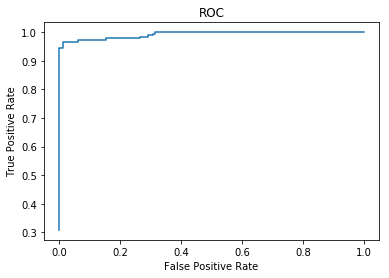

In [98]:
# plotting the ROC curve

%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)